### Bert

In [1]:
!pip install -U transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 67.2 MB/s eta 0:00:00


In [3]:
import time
import torch
import os
import numpy as np
import random
from torch.nn import functional as F
from transformers import AutoTokenizer, AutoModel
def seed_everything(TORCH_SEED):
    random.seed(TORCH_SEED)
    os.environ['PYTHONHASHSEED'] = str(TORCH_SEED)
    np.random.seed(TORCH_SEED)
    torch.manual_seed(TORCH_SEED)
    torch.cuda.manual_seed_all(TORCH_SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
seed_everything(17)
model_id = 'cointegrated/rubert-tiny2'
model_id2 = "sberbank-ai/ruSciBERT"
model = AutoModel.from_pretrained(model_id)    
tokenizer = AutoTokenizer.from_pretrained(model_id)
model2 = AutoModel.from_pretrained(model_id2)    
tokenizer2 = AutoTokenizer.from_pretrained(model_id2)
text1 = '''🔥 Scalable Diffusion Models with Transformers

Вчера вышла интересная работа от ребят из UC Berkeley и NY University про комбинацию диффузии и трансформеров (Diffusion Transformers или DiT).

Ребята заменяют U-Net на трансформер и работают с патчами в латентном пространстве. DiT-XL/2 превосходит все class-conditional диффузионные модели на ImageNet 512x512 и 256x256 бенчмарках и достигает FID=2.27 для низкого разрешения. Более вычислительно тяжёлые DiT позволяют генерировать сэмплы очень высокого качества. 

статья (https://arxiv.org/abs/2212.09748)
гитхаб (https://github.com/facebookresearch/DiT)
колаб (https://colab.research.google.com/github/facebookresearch/DiT/blob/main/run_DiT.ipynb)'''
text2 ='''💻 Russian Texts Statistics (ruts)

👉 Библиотека разработанная для извлечения признаков из произвольного текста. Работает на русском, но ничего не мешает применить для другого языка.

В комплект входят:
•  Базовые статистики (количество слогов, букв, пробелов и тд)
•  Метрики удобочитаемости (уже писал о них (https://t.me/gradientdip/173))
•  Метрики лексического разнообразия (Индекс Симпсона и тд)
•  Морфологические статистики

Визуализации:
— Закон Ципфа
— Литературная дактилоскопия
— Дерево слов

Подойдет в качестве экстрактора для фича инжиниринга к обычному tf-idf или эмбеддингам.

github (https://github.com/SergeyShk/ruTS)'''
text3 = '''Бизнес-образование за рубежом нужно тем, кто хочет получить сертификат престижного международного уровня для поиска работы, а также предпринимателям и менеджерам, которым требуются новые связи и понимание правил бизнеса в других странах. Основатель Mindbox Иван Боровиков в 2022 году окончил двухлетнюю программу MBA в Лондоне. В колонке для Forbes он рассказал, зачем владельцу бизнеса ездить каждый месяц в другую страну для учебы, как выбрать курсы, что написать в сопроводительном письме и с кем из однокурсников лучше не шутить'''
s = time.time()
o = model2.forward(**tokenizer2([text1, text2, text3], padding=True, truncation=True, max_length=128, return_tensors='pt'))['last_hidden_state'][:,0,:]
o = F.normalize(o, dim=0)
print(time.time() - s)

Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Some weights of the model checkpoint at sberbank-ai/ruSciBERT were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at sberbank-ai/ruSciBERT and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1.5238447189331055


In [7]:
F.cosine_similarity(o[0], o[1], dim=-1) - F.cosine_similarity(o[0], o[2], dim=-1)

tensor(0.1803, grad_fn=<SubBackward0>)

In [8]:
s = time.time()
o = model.forward(**tokenizer2([text1, text2, text3], padding=True, truncation=True, max_length=128, return_tensors='pt'))['last_hidden_state'][:,0,:]
o = F.normalize(o, dim=0)
print(time.time() - s)

0.09294843673706055


In [9]:
d = F.cosine_similarity(o[0], o[1], dim=-1) - F.cosine_similarity(o[0], o[2], dim=-1)

In [10]:
d.item()

-0.04222393035888672

### Dataset

In [11]:
import pandas as pd
df = pd.read_csv('dataset.csv')

In [13]:
df_n = df[df['label']==0][:5]
df_n_t = df[df['label']==0][5:]
df_p = df[df['label']==1][:5]
df_p_t = df[df['label']==1][5:]
train = df_p.append(df_n)
y_train = train['label']
X_train = train['text']
test = df_p_t.append(df_n_t)
y_test = test['label']
X_test = test['text']

### Mean vector

In [14]:
import numpy as np
s = time.time()
res = []
for t in range(len(df.text)):
    o = model2.forward(**tokenizer2([df.text.tolist()[t]], padding=True,
                                    truncation=True, max_length=128, return_tensors='pt'))['last_hidden_state'][:,0,:]
    res.append(o.detach().numpy())
res = np.array(res)
mean = np.mean(res, axis=0)
print(time.time() - s)

105.17686772346497


In [15]:
s = time.time()
X_train_emb = []
for t in range(len(X_train)):
    o = model2.forward(**tokenizer2([X_train.tolist()[t]], padding=True,
                                    truncation=True, max_length=128, return_tensors='pt'))['last_hidden_state'][:,0,:]
    X_train_emb.append(o.detach().numpy())
X_train_emb =  np.array(X_train_emb)  
X_train_emb_m = X_train_emb -  mean 
X_test_emb = []

for t in range(len(X_test)):
    o = model2.forward(**tokenizer2([X_test.tolist()[t]], padding=True,
                                    truncation=True, max_length=128, return_tensors='pt'))['last_hidden_state'][:,0,:]
    X_test_emb.append(o.detach().numpy())
X_test_emb =  np.array(X_test_emb)  
X_test_emb_m = X_test_emb - mean
X_train_emb_1 = []
print(time.time() - s)

105.2012984752655


### Topic modeling

In [16]:
!pip install razdel
!mkdir /app && cd /app &&\
  wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip &&\
  unzip mallet-2.0.8.zip && rm mallet-2.0.8.zip
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz &&\
  tar -xvf mystem-3.0-linux3.1-64bit.tar.gz && mv mystem /bin &&\
  rm mystem-3.0-linux3.1-64bit.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-02-14 08:01:23--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2023-02-14 08:01:23--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  44.7MB/s    in 0.3s    

2023-02-14 08:01:23 (44.7 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mal

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


--2023-02-14 08:01:27--  http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving download.cdn.yandex.net (download.cdn.yandex.net)... 5.45.205.244, 5.45.205.245, 5.45.205.241, ...
Connecting to download.cdn.yandex.net (download.cdn.yandex.net)|5.45.205.244|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://cachev2-m9-12.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz?lid=235 [following]
--2023-02-14 08:01:28--  http://cachev2-m9-12.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz?lid=235
Resolving cachev2-m9-12.cdn.yandex.net (cachev2-m9-12.cdn.yandex.net)... 37.9.111.96, 2a02:6b8:c35:1:0:562:0:15
Connecting to cachev2-m9-12.cdn.yandex.net (cachev2-m9-12.cdn.yandex.net)|37.9.111.96|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16457938 (16M) [application/octet-stream]
Saving to: ‘mystem-3.0-linux3.1-64bit.tar.gz’

mystem-3.0-linux3.1 100%[==

In [19]:
import nltk
import gensim 
import string
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.wrappers import LdaMallet
import razdel
import warnings
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from pymystem3 import Mystem
from tqdm import tqdm
from gensim.models import CoherenceModel
from urllib.parse import quote_plus as quote
import re
warnings.filterwarnings("ignore")
def format_topics_sentences(ldamodel, corpus, texts):
    topic_num_l, prop_topic_l, topic_keywords_l, row_l = [], [], [], []
    sent_topics_df = pd.DataFrame()
    for i, row in tqdm(enumerate(ldamodel[corpus]), desc='Building of table', total=len(corpus)):
        elem = max(row, key=lambda x: x[1])
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        topic_num, prop_topic = elem
        wp = ldamodel.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, _ in wp])
        topic_num_l.append(int(topic_num))
        prop_topic_l.append(round(prop_topic, 4))
        topic_keywords_l.append(topic_keywords)
        row_l.append(row)
    tab = pd.DataFrame(topic_num_l, columns=['topic_num'])
    tab['prop_topic'] = prop_topic_l
    tab['topic_keywords'] = topic_keywords_l
    tab['row'] = row_l
    contents = pd.Series(texts)
    tab = pd.concat([tab, contents], axis=1)
    return tab
def preprocessing(data):
    def tokenize_with_razdel(text):
        return [token.text for token in razdel.tokenize(text)]

    def make_bigrams(texts):
        return [bigram_mod[doc] for doc in texts]

    def make_trigrams(texts):
        return [trigram_mod[bigram_mod[doc]] for doc in texts]
    def remove_urls( documents) -> list:
        return [re.sub('https?:\/\/.*?[\s+]', '', text) for text in documents]

    data = [str(i) for i in data]
    data = [i.lower() for i in data]
    text = [i.replace('\xa0', ' ') for i in data]
    text = remove_urls(text)
    sentences = [nltk.sent_tokenize(paragraph) for paragraph in text] # токенизация по предложениям
    sentences = [sen for sublist in sentences for sen in sublist]
    tokenized_sentences = [tokenize_with_razdel(sentence) for sentence in sentences]
    clean_tokenized_sentences = [
        [word for word in sentence if word.isalpha()] 
        for sentence in tokenized_sentences]
    stop_words = stopwords.words('russian') + ['это', 'который', 'также', 'например']
    clean_tokenized_sentences = [
        [token for token in sent if token not in stop_words and len(token) > 1] 
        for sent in clean_tokenized_sentences]

    mystem = Mystem() # лемматизатор
    clean_tokenized_sentences = [
        [lemma for lemma in mystem.lemmatize(' '.join(token_sentence)) if not lemma.isspace()] 
        for token_sentence in tqdm(clean_tokenized_sentences, desc='Lemmatization progress')]
    clean_tokenized_sentences = [
        [token for token in sent if token not in stop_words and len(token) > 1] 
        for sent in clean_tokenized_sentences]
    # Строим модели биграм и триграм
    bigram = gensim.models.Phrases(
        clean_tokenized_sentences,
        min_count=5, 
        threshold=100)  # ,больше threshold == меньше фраз.
    trigram = gensim.models.Phrases(bigram[clean_tokenized_sentences], threshold=100)

    # Более быстрый способ превратить фразу в триграмму/биграмму
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    clean_tokenized_sentences = make_trigrams(clean_tokenized_sentences)
    id2word = corpora.Dictionary(clean_tokenized_sentences)
    id2word.filter_extremes(no_below=10, no_above=0.7)
    # Create Corpus
    texts = clean_tokenized_sentences
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]
    print('Preprocessing finished successfully!')
    return corpus, id2word, sentences
class LDAMalletModel():
    def __init__(self):
        print('...LDA Mallet...')
        self.send = {}

    def fit(self, data, mallet_path='/app/mallet-2.0.8/bin/mallet', 
            preproc_func=preprocessing, num_topics=20, prefix=''):
        self.corpus, id2word, self.data = preproc_func(data)
        self.ldamallet = LdaMallet(mallet_path=mallet_path,
                                   corpus=self.corpus,
                                   num_topics=num_topics,
                                   id2word=id2word,
                                   prefix=prefix,
                                   workers=8)
        print('Model training finished successfully!')

    def show_table(self):
        df_topic_sents_keywords = format_topics_sentences(
            ldamodel=self.ldamallet, corpus=self.corpus, texts=self.data)
        print('Building of table finished successfully!')
        # Format
        df_dominant_topic = df_topic_sents_keywords.reset_index()
        df_dominant_topic.columns = [
            'Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 
            'Keywords', 'Prob_of_all_topics', 'Text']
        return df_dominant_topic


    def get_topics_by_doc_id(self, table, doc_id):
        dct = {'content': table.loc[doc_id]['Text']}
        distr = []
        for i in table.loc[doc_id]['Prob_of_all_topics']:
            distr.append( i[1])
        return distr

    def intertopic_map(self):
        return sorted(self.ldamallet.show_topics(formatted=False, num_topics=-1), key=lambda x: x[0])

In [20]:
lda = LDAMalletModel()
lda.fit(df.text)
topic_train = format_topics_sentences(lda.ldamallet, preprocessing(X_train)[0],  X_train)
topic_train.dropna(inplace=True)
topic_train = np.array(list(topic_train['row'].apply(lambda x:[i[1] for i in x])))
topic_test = format_topics_sentences(lda.ldamallet, preprocessing(X_test)[0],  X_test)
topic_test.dropna(inplace=True)
topic_test = np.array(list(topic_test['row'].apply(lambda x: [i[1] for i in x])))

...LDA Mallet...


Lemmatization progress: 100%|██████████| 698/698 [00:02<00:00, 268.26it/s]


Preprocessing finished successfully!
Model training finished successfully!


Lemmatization progress: 100%|██████████| 32/32 [00:01<00:00, 25.84it/s]


Preprocessing finished successfully!


Lemmatization progress: 100%|██████████| 666/666 [00:01<00:00, 340.15it/s]


Preprocessing finished successfully!


Building of table: 100%|██████████| 666/666 [00:00<00:00, 14292.40it/s]


###Tf Idf

In [21]:
class KeyWords:
    def __init__(self, language='russian'):
        self.punctuation = string.punctuation + '»' + '«'
        self.lang = language
        self.stop_words = stopwords.words(language)

        if language == 'russian':
            self.stem = Mystem()
        else:
            self.stem = SnowballStemmer(language='english')
            self.stop_words += ['i']

    def remove_urls(self, documents) -> list:
        return [re.sub('https?:\/\/.*?[\s+]', '', text) for text in documents]

    def replace_newline(self, documents):
        documents = [text.replace('\n', ' ') + ' ' for text in documents]
        return documents

    def remove_strange_symbols(self, documents):
        return [re.sub(f'[^A-Za-zА-Яа-яё0-9{string.punctuation}\ ]+', ' ', text) for text in documents]

    def tokenize(self, documents) -> list:
        if self.lang == 'english':
            return [nltk.word_tokenize(text) for text in documents]
        else:
            return [[token.text for token in razdel.tokenize(text)] for text in documents]

    def to_lower(self, documents) -> list:
        return [text.lower() for text in documents]

    def remove_punctuation(self, tokenized_documents):
        ttt = set(string.punctuation)
        return [[token for token in tokenized_text if not set(token) < ttt] for tokenized_text in tokenized_documents]

    def remove_numbers(self, documents):
        return [re.sub('(?!:\s)\d\.?\d*', ' ', text) for text in documents]

    def remove_stop_words(self, tokenized_documents) -> list:
        return [[token for token in tokenized_text if token not in self.stop_words] for tokenized_text in
                tokenized_documents]

    def lemmatize(self, documents) -> list:
        if self.lang == 'russian':
            return [''.join(self.stem.lemmatize(text)) for text in documents]
        else:
            return [' '.join(self.stem.stem(token) for token in text.split()) for text in documents]

    def preprocessing(self, documents):
        documents = self.replace_newline(documents)
        documents = self.remove_urls(documents)
        documents = self.remove_strange_symbols(documents)
        documents = self.to_lower(documents)
        documents = self.lemmatize(documents)
        documents = self.remove_numbers(documents)
        tokenized_documents = self.tokenize(documents)
        tokenized_documents = self.remove_stop_words(tokenized_documents)
        tokenized_documents = self.remove_punctuation(tokenized_documents)
        documents = [' '.join(tokenized_text) for tokenized_text in tokenized_documents]
        return documents

    def get_tfifd(self, documents):
        clean_documents = self.preprocessing(documents)

        tf_idf_vectorizer = TfidfVectorizer()
        tf_idf_vectorizer.fit(clean_documents)

        return tf_idf_vectorizer

In [22]:
kw = KeyWords()
tfidf = kw.get_tfifd(df.text)

In [25]:
tfidf_train = tfidf.transform(kw.preprocessing(X_train)).toarray()
tfidf_test = tfidf.transform(kw.preprocessing(X_test)).toarray()

### Metrics

In [26]:
from sklearn.svm import SVC, SVR
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, accuracy_score

In [27]:
class CosineModel():
    def __init__(self):
        self.positive = None
        self.negative = None
    def fit(self, X, y):
        self.positive = torch.from_numpy(X[y[y == 1].index[0]])
        self.negative = torch.from_numpy(X[y[y == 0].index[0]])
    def predict(self, X):
         return [int(F.cosine_similarity(torch.from_numpy(x), self.positive, dim=-1) > F.cosine_similarity(torch.from_numpy(x), self.negative, dim=-1))  for x in X]

In [28]:
X_train_emb = np.squeeze(X_train_emb)
X_test_emb = np.squeeze(X_test_emb)
X_train_emb_m = X_train_emb - mean
X_test_emb_m =  X_test_emb - mean

In [33]:
def calc(X_train, X_test, y_train, y_test, type_, ):
    model = SVC()
    model_1 = CosineModel()
    model.fit(X_train, y_train)
    model_1.fit(X_train, y_train)
    return ['Cosinus',  roc_auc_score(y_test, model_1.predict(X_test)),\
            f1_score(y_test, model_1.predict(X_test)), type_],\
    ['SVM',  roc_auc_score(y_test, model.predict(X_test)),\
     f1_score(y_test, model.predict(X_test)),  type_]

In [34]:

res = []

o, o1 =  calc(X_train_emb, X_test_emb, y_train, y_test,
              'Bert')
res.append(o)
res.append(o1)
o, o1 =  calc(X_train_emb_m, X_test_emb_m, y_train, y_test,
              'Bert Mean')
res.append(o)
res.append(o1)

o, o1 =  calc(topic_train, topic_test, y_train, y_test,
              'Topic')
res.append(o)
res.append(o1)
o, o1 =  calc(tfidf_train, tfidf_test, y_train, y_test,
              'TF-IDF')
res.append(o)
res.append(o1)
o, o1 =  calc(np.concatenate([X_train_emb_m, tfidf_train], axis=1),
              np.concatenate([X_test_emb_m, tfidf_test], axis=1), y_train, y_test, 'Bert Mean TF-IDF')
res.append(o)
res.append(o1)
o, o1 =  calc(np.concatenate([X_train_emb_m, topic_train], axis=1),
              np.concatenate([X_test_emb_m, topic_test], axis=1), y_train, y_test, 'Bert Mean Topic')
res.append(o)
res.append(o1)
o, o1 =  calc(np.concatenate([X_train_emb_m, topic_train,  tfidf_train], axis=1),
              np.concatenate([X_test_emb_m, topic_test, tfidf_test], axis=1), y_train, y_test, 'Bert Mean Topic TF-IDF')
res.append(o)
res.append(o1)
res = pd.DataFrame(res, columns=['model', 'roc_auc', 'f1', 'feature'])

In [35]:
res.sort_values('roc_auc', ascending=False)

,model,roc_auc,f1,feature
7,SVM,0.919444,0.600000,TF-IDF
4,Cosinus,0.708333,0.244898,Topic
6,Cosinus,0.630556,0.139130,TF-IDF
3,SVM,0.619444,0.140000,Bert Mean
9,SVM,0.619444,0.140000,Bert Mean TF-IDF
11,SVM,0.619444,0.140000,Bert Mean Topic
13,SVM,0.619444,0.140000,Bert Mean Topic TF-IDF
5,SVM,0.600000,0.121951,Topic
1,SVM,0.591667,0.124031,Bert
2,Cosinus,0.522222,0.103448,Bert Mean


In [36]:
res.sort_values('f1', ascending=False)

,model,roc_auc,f1,feature
7,SVM,0.919444,0.600000,TF-IDF
4,Cosinus,0.708333,0.244898,Topic
3,SVM,0.619444,0.140000,Bert Mean
9,SVM,0.619444,0.140000,Bert Mean TF-IDF
11,SVM,0.619444,0.140000,Bert Mean Topic
13,SVM,0.619444,0.140000,Bert Mean Topic TF-IDF
6,Cosinus,0.630556,0.139130,TF-IDF
1,SVM,0.591667,0.124031,Bert
5,SVM,0.600000,0.121951,Topic
2,Cosinus,0.522222,0.103448,Bert Mean


In [39]:
res.sort_values('roc_auc', ascending=False)

,model,roc_auc,f1,feature
7,SVM,0.919444,0.600000,TF-IDF
4,Cosinus,0.708333,0.244898,Topic
6,Cosinus,0.630556,0.139130,TF-IDF
3,SVM,0.619444,0.140000,Bert Mean
9,SVM,0.619444,0.140000,Bert Mean TF-IDF
11,SVM,0.619444,0.140000,Bert Mean Topic
13,SVM,0.619444,0.140000,Bert Mean Topic TF-IDF
5,SVM,0.600000,0.121951,Topic
1,SVM,0.591667,0.124031,Bert
2,Cosinus,0.522222,0.103448,Bert Mean


In [40]:
res.to_csv('metics.csv')

In [44]:
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline



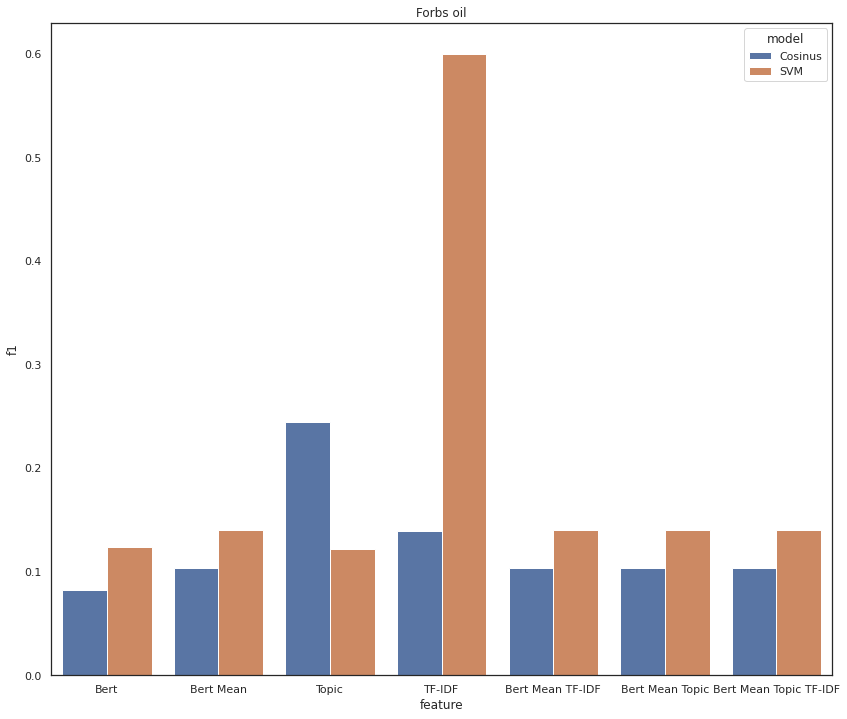

In [74]:
sns.set(style='white', font_scale=1)
plt.figure(figsize=(14, 12), )
sns.barplot(data=res, x='feature', y='f1', hue='model').set_title("Forbs oil").get_figure().savefig("f1.png") 

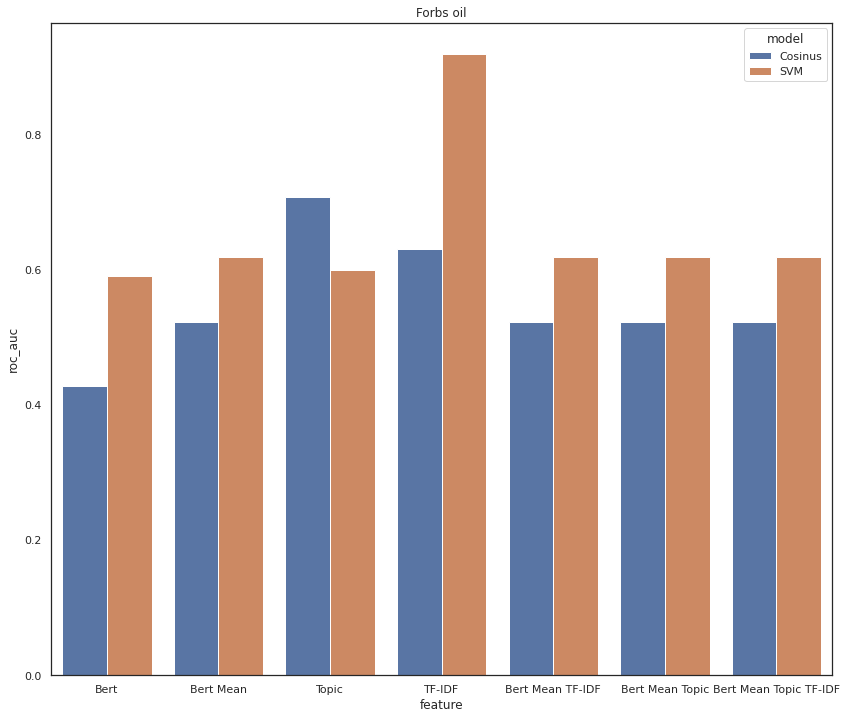

In [69]:
sns.set(style='white', font_scale=1)
plt.figure(figsize=(14, 12), )
sns.barplot(data=res, x='feature', y='roc_auc', hue='model').set_title("Forbs oil").get_figure().savefig("roc_auc.png") 

In [54]:
labels = df.label.value_counts().reset_index()
labels.columns = ['label', 'count']

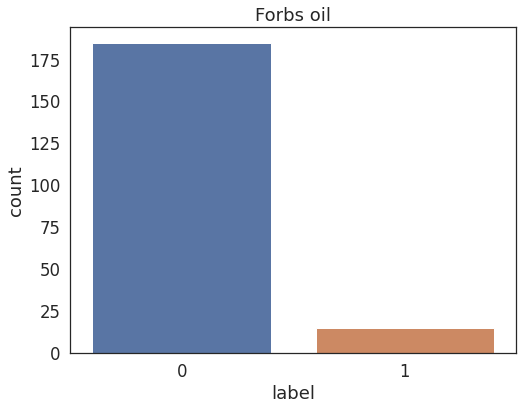

In [63]:
sns.set(style='white', font_scale=1.5)
plt.figure(figsize=(8, 6) )
sns.barplot(data=labels, x='label', y='count').set_title("Forbs oil").get_figure().savefig("dataset.png") 